# TABLE OF CONTENTS
### [OVERVIEW OF OSEMiNl](#OVERVIEW-OF-OSEMiN)
- [OBTAIN](#OBTAIN) 
- [SCRUB](#SCRUB) 
- [EXPLORE](#EXPLORE) 
- [MODEL](#MODEL) 
- [iNTERPRET](#iNTERPRET) 

### [CONCLUSIONS & RECOMMENDATIONS](#CONCLUSIONS-&-RECOMMENDATIONS)
___

# OVERVIEW OF OSEMiN


<img src='https://raw.githubusercontent.com/learn-co-curriculum/online-ds-ft-100719/master/osemind.png?token=AKWNGY6ANK33DJDTWNP7OOK5WTWRU' width=800>
<center><a href="https://www.kdnuggets.com/2018/02/data-science-command-line-book-exploring-data.html">Source: KDNuggets</a></center>

>  The Data Science Process we'll be using during this section--OSEMiN (pronounced "OH-sum", rhymes with "possum").  This is the most straightforward of the Data Science Processes discussed so far.  **Note that during this process, just like the others, the stages often blur together.***  It is completely acceptable (and ***often a best practice!) to float back and forth** between stages as you learn new things about your problem, dataset, requirements, etc.  
>  It's quite common to get to the modeling step and realize that you need to scrub your data a bit more or engineer a different feature and jump back to the "Scrub" stage, or go all the way back to the "Obtain" stage when you realize your current data isn't sufficient to solve this problem. 
As with any of these frameworks, *OSEMiN is meant to be treated as guidelines, not law. 

- **[OBTAIN](#OBTAIN)**

This step involves understanding stakeholder requirements, gathering information on the problem, and finally sourcing data that we think will be necessary for solving this problem. 

- **[SCRUB](#SCRUB)**

During this stage, we'll focus on preprocessing our data.  Important steps such as identifying and removing null values, dealing with outliers, normalizing data, and feature engineering/feature selection are handled around this stage.  The line with this stage really blurs with the _Explore_ stage, as it is common to only realize that certain columns require cleaning or preprocessing as a result of the visualzations and explorations done during Step 3.  

Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration.  This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded. 

- **[EXPLORE](#EXPLORE)**

This step focuses on getting to know the dataset you're working with. As mentioned above, this step tends to blend with the _Scrub_ step mentioned above.  During this step, you'll create visualizations to really get a feel for your dataset.  You'll focus on things such as understanding the distribution of different columns, checking for multicollinearity, and other tasks liek that.  If your project is a classification task, you may check the balance of the different classes in your dataset.  If your problem is a regression task, you may check that the dataset meets the assumptions necessary for a regression task.  

At the end of this step, you should have a dataset ready for modeling that you've thoroughly explored and are extremely familiar with.  

- **[MODEL](#MODEL)**

This step, as with the last two frameworks, is also pretty self-explanatory. It consists of building and tuning models using all the tools you have in your data science toolbox.  In practice, this often means defining a threshold for success, selecting machine learning algorithms to test on the project, and tuning the ones that show promise to try and increase your results.  As with the other stages, it is both common and accepted to realize something, jump back to a previous stage like _Scrub_ or _Explore_, and make some changes to see how it affects the model.  

- **[iNTERPRET](#iNTERPRET)**

During this step, you'll interpret the results of your model(s), and communicate results to stakeholders.  As with the other frameworks, communication is incredibily important! During this stage, you may come to realize that further investigation is needed, or more data.  That's totally fine--figure out what's needed, go get it, and start the process over! If your results are satisfactory to all stakeholders involved, you may also go from this stage right into productionizing your model and automating processes necessary to support it.  


## Additional Links
* ML models google sheet https://docs.google.com/spreadsheets/d/1qe4nYjGKSxBNCkeV2gxxgObBpKKc0TKrbk0Y9LTrpV8
* How to detect and remove outliers:
    * https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
* How to handle categorical variables. 
    * https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63
* Sci-Kit Learn’s Scalers visually explained 
    * http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

# PROCESS CHECKLIST

1. **OBTAIN:**
    - Import data, inspect, check for datatypes to convert and null values
    - Display header and info.
    - Drop any unneeded columns, if known (`df.drop(['col1','col2'],axis=1,inplace=True`)
    <br><br>

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**
    - Check and cast data types
        - [ ] Check for #'s that are store as objects (`df.info()`,`df.describe()`)
            - when converting to #'s, look for odd values (like many 0's), or strings that can't be converted.
            - Decide how to deal weird/null values (`df.unique()`, `df.isna().sum()`)
            - `df.fillna(subset=['col_with_nulls'],'fill_value')`, `df.replace()`
        - [ ]  Check for categorical variables stored as integers.
            - May be easier to tell when you make a scatter plotm or `pd.plotting.scatter_matrix()`
    - [ ] Check for missing values  (df.isna().sum())
        - Can drop rows or colums
        - For missing numeric data with median or bin/convert to categorical
        - For missing categorical data: make NaN own category OR replace with most common category
    - [ ] Check for multicollinearity
        - Use seaborn to make correlation matrix plot 
        - Good rule of thumb is anything over 0.75 corr is high, remove the variable that has the most correl with the largest # of variables
    - [ ] Normalize data (may want to do after some exploring)
        - Most popular is Z-scoring (but won't fix skew) 
        - Can log-transform to fix skewed data
    
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [ ] Check scales, ranges (df.describe())
    - [ ] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform.
        - Can also do kernel density estimates
    - [ ] Use scatter plots to check for linearity and possible categorical variables (`df.plot("x","y")`)
        - categoricals will look like vertical lines
    - [ ] Use `pd.plotting.scatter_matrix(df)` to visualize possible relationships
    - [ ] Check for linearity.
   
4. **FIT AN INITIAL MODEL:** 
    - Various forms, detail later...
    - **Assessing the model:**
        - Assess parameters (slope,intercept)
        - Check if the model explains the variation in the data (RMSE, F, R_square)
        - *Are the coeffs, slopes, intercepts in appropriate units?*
        - *Whats the impact of collinearity? Can we ignore?*
        <br><br>
5. **Revise the fitted model**
    - Multicollinearity is big issue for lin regression and cannot fully remove it
    - Use the predictive ability of model to test it (like R2 and RMSE)
    - Check for missed non-linearity
6. **Holdout validation / Train/test split**
    - use sklearn train_test_split 
___

In [1]:
# PyPi package for cohort
# !pip install -U fsds_100719 # comment out after install so it won't run again

# OBTAIN

In [2]:
!pip install -U fsds_100719
import IPython.display as disp
disp.clear_output()

In [3]:
# Shortcut import of 
# import pandas as pd, numpy as np, etc...
import fsds_100719 as fs
from fsds_100719.imports import *

Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [4]:
%ls

CONTRIBUTING.md             draft_files/
LICENSE.md                  kc_house_data.csv
README.md                   module1_project_rubric.pdf
awesome.gif                 presentation.pdf
column_names.md             student.ipynb
draft.htm


In [5]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Define Functions

In [6]:
# Check columns returns the datatype, null values and unique values of input series 
def check_column(series_feature, series_target=None, max_unique=10,
                 nbins = None):
    """Takes a series from a dataframe (df[col]), 
    reports back info on unique values, nulls, .describe() stats.
    
    
    Args:
        series (series (DataFrame column)): column to report    
    """
    dashes = '---'*25
    series=series_feature
    
    
    print(dashes)
    
    print(f"series dtype is {series.dtype}\n")
    print(f'- Unique Values for {series.name}')
    display(series.value_counts(bins = nbins))#[0:max_unique])#[:max_unique])
    
    print('n- Null Values ')
    nulls = series.isna().sum()
    print(nulls)
    
    print('\n\tDescribe')
    print(series.describe())
    
    if series.dtype != 'object':
        fig, axes = plt.subplots(figsize=(15, 5), ncols=2, nrows=1)
        axes[0].set_title(f"Showing {series_target.name}")
        axes[0].set_title(series.name)
        sns.distplot(series, ax = axes[0])
    else:
        print(f"{series.name} is a string column and cannot be plotted")

    if series_target is not None: 
        axes[1].set_title(f"{series_feature.name} vs {series_target.name} (in thousands)")
        sns.scatterplot(series_feature, series_target, ax = axes[1])

In [7]:
def check_outliers(feature, std_multiplier = 3) :
    """ Takes a series or a dataframe as a feaature and provides feedback on 
    the following:
    
    The feature's mean value
    The value of a given standard deviation
    A count of records above that value
    The percent of total records above that value.
    
    Parameters
    ----------
    feature : series or dataframe
    std_multiplier : integer, default 3, used to by specify how my times 
    to multiply the standard deviation to reach the final figure.
    
    The purpose of this function is to provide insight about a feature's number
    of records beyond a certain point relative to standard deviation before
    invoking function cut_outliers.
    """
    feature_std_xx = round(feature.mean() + (feature.std()*std_multiplier), 2)
    feature_cut = df.loc[df[feature.name] > feature_std_xx][feature.name]
    outside_std_count = feature_cut.count()
    pct_outside_std = round(outside_std_count / feature.count(), 2)
    print(f'Mean feature value is: {round(feature.mean(),2)}')
    print(f'{std_multiplier}x standard deviation cutoff: {feature_std_xx}')
    print(f'Records above {std_multiplier}x standard deviation: {outside_std_count}')
    print(f'Percent of records above {std_multiplier}x standard deviation: {pct_outside_std}')
    
    feature_std_lxx = round(feature.mean() - (feature.std()*std_multiplier), 2)
    feature_cutl = df.loc[df[feature.name] < feature_std_lxx][feature.name]
    outside_std_countl = feature_cutl.count()
    pct_outside_stdl = round(outside_std_countl / feature.count(), 2)
    print(f'{std_multiplier}x standard deviation lower cutoff: {feature_std_lxx}')
    print(f'Records below {std_multiplier}x standard deviation: {outside_std_countl}')
    print(f'Percent of records above {std_multiplier}x standard deviation: {pct_outside_stdl}')

In [8]:
def cut_upper_outliers(feature, std_multiplier = 3):
    """Takes a series or dataframe and returns a series with all records cut
    out above the standard deviation multiplied as specified in argument.
    
    Parameters
    ----------
    feature : series or dataframe
    std_multiplier : integer, default 3, used to by specify how my times 
    to multiply the standard deviation to reach the final figure.
    """  
    
    feature_std_xx = round(feature.mean() + (feature.std()*std_multiplier), 2)
#     return df.loc[df[feature.name] < feature_std_xx][feature.name]
    return df.loc[df[feature.name] < feature_std_xx]

In [9]:
def cut_lower_outliers(feature, std_multiplier = 3):
    """Takes a series or dataframe and returns a series with all records cut
    out above the standard deviation multiplied as specified in argument.
    
    Parameters
    ----------
    feature : series or dataframe
    std_multiplier : integer, default 3, used to by specify how my times 
    to multiply the standard deviation to reach the final figure.
    """  
    
#     feature_std_xx = round(feature.mean() + (feature.std()*std_multiplier), 2)
    feature_std_lxx = round(feature.mean() - (feature.std()*std_multiplier), 2)
    return df.loc[df[feature.name] > feature_std_lxx][feature.name]

# SCRUB

In [10]:
# Ignore pink warnings 
import warnings
warnings.filterwarnings('ignore')

# Allow for a large # of columns
pd.set_option('display.max_columns',0)
# pd.set_option('display.max_rows','')

## Information Overview

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [12]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## Cleaning Data

In [13]:
# scaling price to make it more readable.
df['price'] = df['price'] / 1000

In [14]:
# Starting to get rid of unnecessary columns and data.
df = df.drop(['id'], axis = 1)

In [15]:
#Proceeding to find null values and figure out 
# what to do with those.

In [16]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [17]:
# View is a difficult category to desipher anyway, so I'm not going to worry about
# the null values there since I won't be using that data.

In [18]:
df = df.drop(['view'], axis = 1)

In [19]:
# Beyond that, it looks like the only offenders are waterfrom and yr_renovated. 
# In both cases, it actually makes sense not to have values in the records,
# since the question would not apply to most houses. Yr renovated is boyond the
# scope of the questions I'll be asking, so I'll drop that one.

In [20]:
df = df.drop(['yr_renovated'], axis = 1)

In [21]:
# For waterfront, I'll replace those null values with zeros. It's a bit of a 
# stretch of an assumption to assume all or most of the null values are non-
# waterfront, but it's such an important variable for home value that I feel 
# compelled to keep it.

In [22]:
df['waterfront'] = df['waterfront'].fillna(0)

In [23]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Checking for duplicates:

In [24]:
df[df.duplicated()]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15


Looks fine!

# EXPLORE

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for sqft_living


(1687.0, 3004.0]      10166
(356.829, 1687.0]      8354
(3004.0, 4321.0]       2580
(4321.0, 5638.0]        395
(5638.0, 6955.0]         72
(6955.0, 8272.0]         23
(9589.0, 10906.0]         3
(8272.0, 9589.0]          2
(12223.0, 13540.0]        1
(10906.0, 12223.0]        1
Name: sqft_living, dtype: int64

n- Null Values 
0

	Describe
count    21597.000000
mean      2080.321850
std        918.106125
min        370.000000
25%       1430.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64


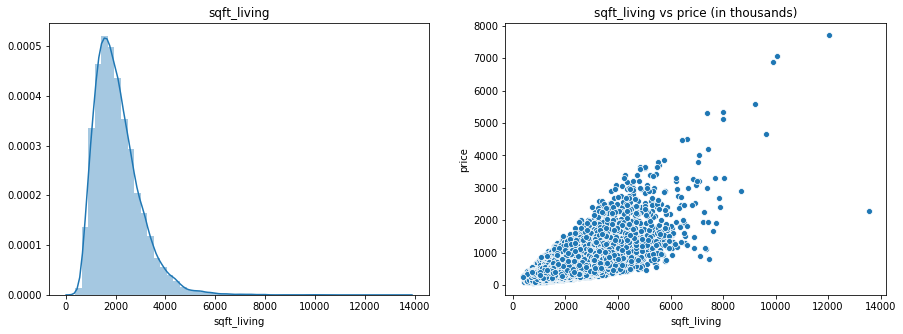

In [25]:
#Check the most obvious factor.

check_column(df['sqft_living'], df['price'], nbins = 10)

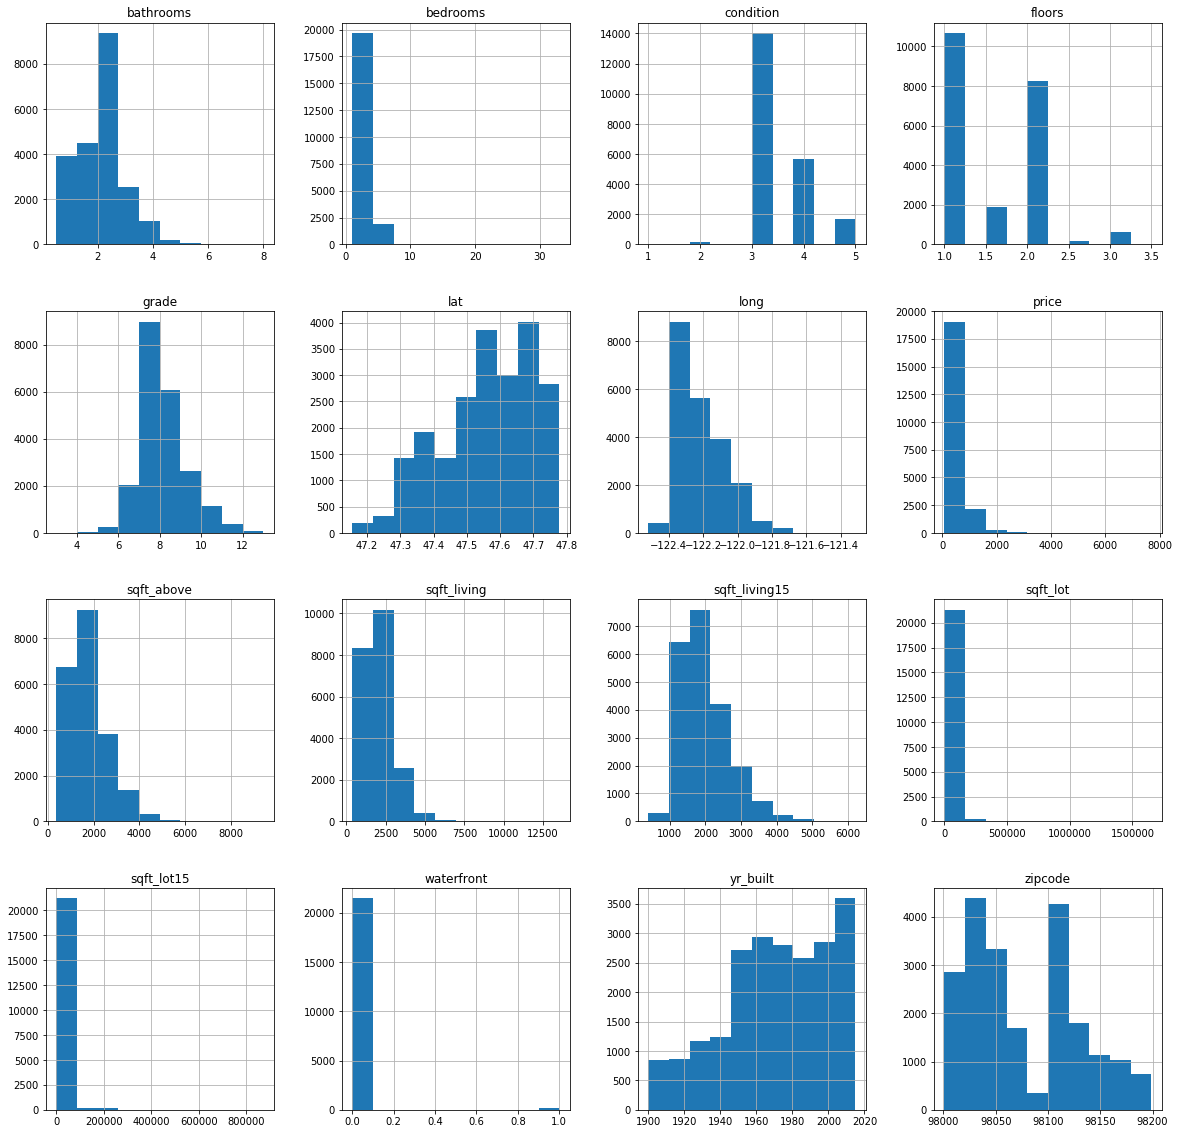

In [26]:
df.hist(figsize=(20,20));

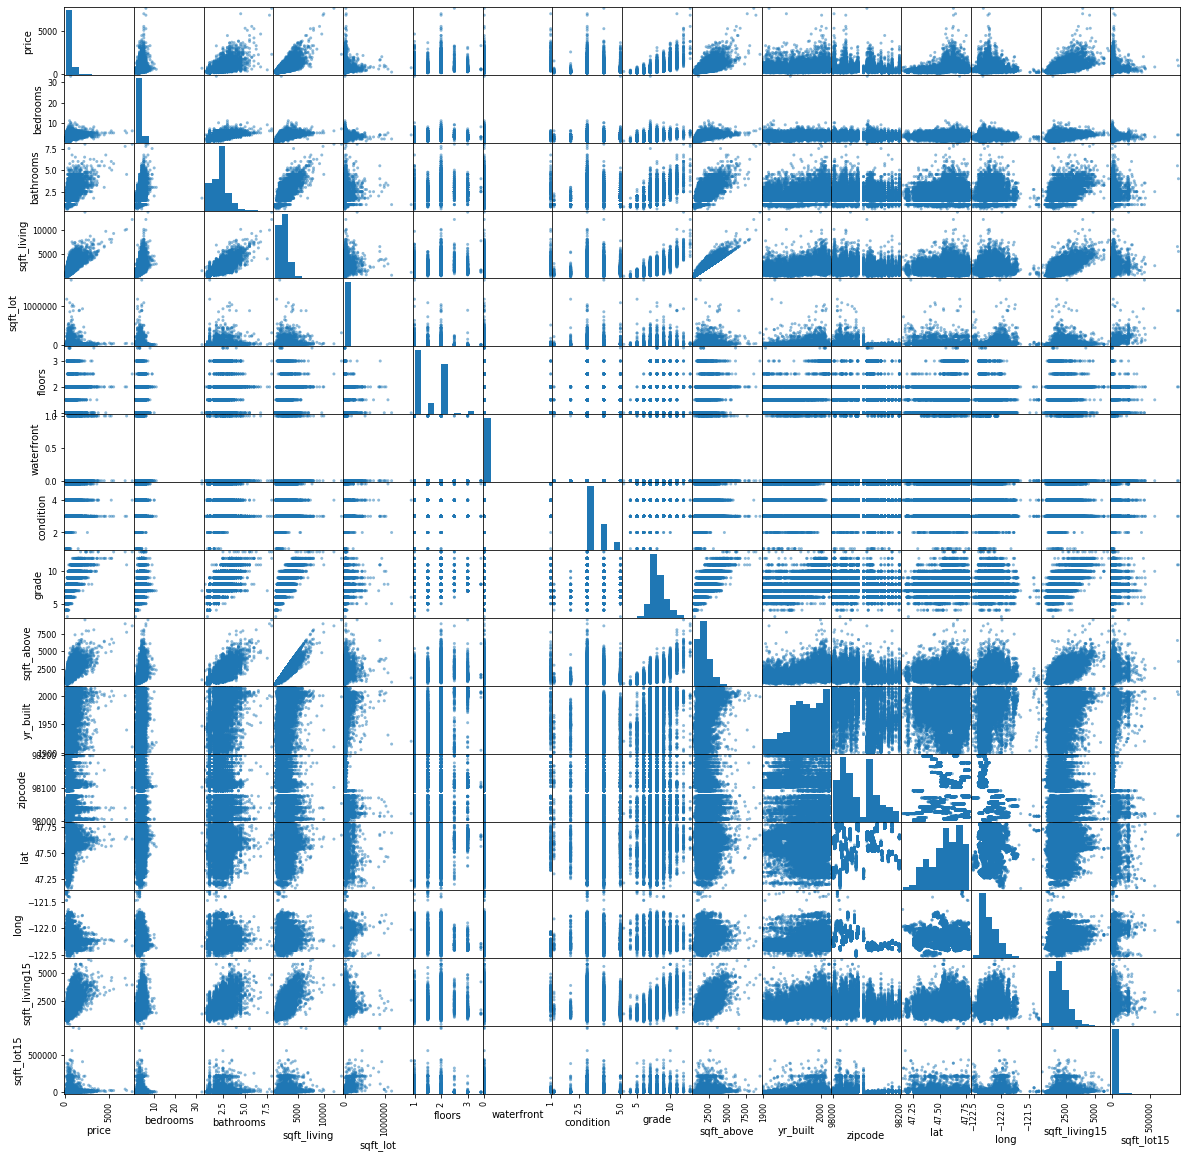

In [27]:
pd.plotting.scatter_matrix(df, figsize=(20,20));
# Commenting out to save computing time during re-runs.

## Handle outliers

There is a wide variance among houses in the very highest reaches of the price range throwing things into chaos, and their small numbers make them good candidates for being cut.

All homes above roughly 1.6M make up only 2% of the total set. And  yet 
the mean price is only 540K. I'll get rid rid of that far-end 2%. 

I mean, one of those houses could have belonged to Kurt Cobain, throwing
off the whole curve.

First, price:

In [28]:
df.price.describe()

count    21597.000000
mean       540.296574
std        367.368140
min         78.000000
25%        322.000000
50%        450.000000
75%        645.000000
max       7700.000000
Name: price, dtype: float64

In [29]:
check_outliers(df.price, 3)

Mean feature value is: 540.3
3x standard deviation cutoff: 1642.4
Records above 3x standard deviation: 406
Percent of records above 3x standard deviation: 0.02
3x standard deviation lower cutoff: -561.81
Records below 3x standard deviation: 0
Percent of records above 3x standard deviation: 0.0


In [30]:
df = cut_upper_outliers(df.price, 3)

In [31]:
df.price.describe()

count    21191.000000
mean       507.010292
std        259.462210
min         78.000000
25%        320.000000
50%        447.000000
75%        627.650000
max       1640.000000
Name: price, dtype: float64

Next, bedrooms:

Next, sqft_living:

In [32]:
df.sqft_living.describe()

count    21191.000000
mean      2032.486103
std        836.738586
min        370.000000
25%       1410.000000
50%       1890.000000
75%       2500.000000
max       7480.000000
Name: sqft_living, dtype: float64

In [33]:
check_outliers(df.sqft_living)

Mean feature value is: 2032.49
3x standard deviation cutoff: 4542.7
Records above 3x standard deviation: 194
Percent of records above 3x standard deviation: 0.01
3x standard deviation lower cutoff: -477.73
Records below 3x standard deviation: 0
Percent of records above 3x standard deviation: 0.0


In [34]:
df = cut_upper_outliers(df.sqft_living)

In [35]:
df.sqft_living.describe()

count    20997.000000
mean      2003.336715
std        781.184688
min        370.000000
25%       1410.000000
50%       1880.000000
75%       2483.000000
max       4540.000000
Name: sqft_living, dtype: float64

Next, latitude and longitude:

In [36]:
check_outliers(df.lat, 3)

Mean feature value is: 47.56
3x standard deviation cutoff: 47.98
Records above 3x standard deviation: 0
Percent of records above 3x standard deviation: 0.0
3x standard deviation lower cutoff: 47.14
Records below 3x standard deviation: 0
Percent of records above 3x standard deviation: 0.0


In [37]:
check_outliers(df.long, 3)

Mean feature value is: -122.21
3x standard deviation cutoff: -121.79
Records above 3x standard deviation: 227
Percent of records above 3x standard deviation: 0.01
3x standard deviation lower cutoff: -122.64
Records below 3x standard deviation: 0
Percent of records above 3x standard deviation: 0.0


In [38]:
df = cut_upper_outliers(df.long, 3)

In [39]:
check_outliers(df.long, 3)

Mean feature value is: -122.22
3x standard deviation cutoff: -121.82
Records above 3x standard deviation: 22
Percent of records above 3x standard deviation: 0.0
3x standard deviation lower cutoff: -122.62
Records below 3x standard deviation: 0
Percent of records above 3x standard deviation: 0.0


I want to have a closer look at bedrooms

In [40]:
df['bedrooms'].value_counts()

3     9599
4     6536
2     2732
5     1429
6      236
1      192
7       28
8        9
9        5
10       2
11       1
33       1
Name: bedrooms, dtype: int64

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for bedrooms


3     9599
4     6536
2     2732
5     1429
6      236
1      192
7       28
8        9
9        5
10       2
11       1
33       1
Name: bedrooms, dtype: int64

n- Null Values 
0

	Describe
count    20770.000000
mean         3.347857
std          0.912085
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64


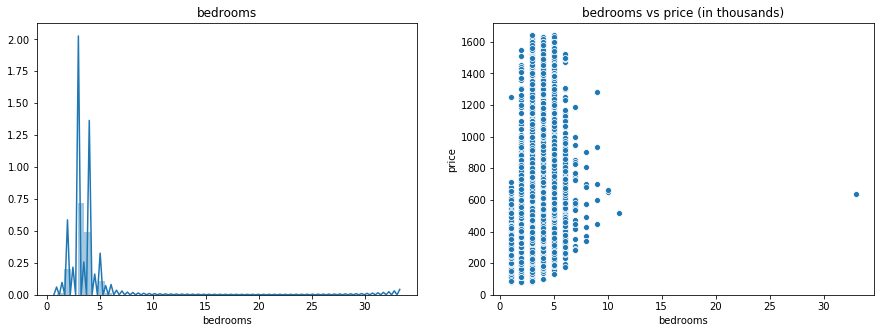

In [41]:
check_column(df.bedrooms, df.price)

In [42]:
check_outliers(df.bedrooms)

Mean feature value is: 3.35
3x standard deviation cutoff: 6.08
Records above 3x standard deviation: 46
Percent of records above 3x standard deviation: 0.0
3x standard deviation lower cutoff: 0.61
Records below 3x standard deviation: 0
Percent of records above 3x standard deviation: 0.0


There's actually something interesting going on here, so I'm not going to remove all >3x std outliers. Just that one at 33 bedrooms that is clearly a typo.

In [43]:
df = df.loc[df['bedrooms'] < 33]

In [44]:
df.loc[df['bedrooms'] > 33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15


---------------------------------------------------------------------------
series dtype is int64

- Unique Values for bedrooms


3     9599
4     6536
2     2732
5     1429
6      236
1      192
7       28
8        9
9        5
10       2
11       1
Name: bedrooms, dtype: int64

n- Null Values 
0

	Describe
count    20769.000000
mean         3.346430
std          0.888595
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64


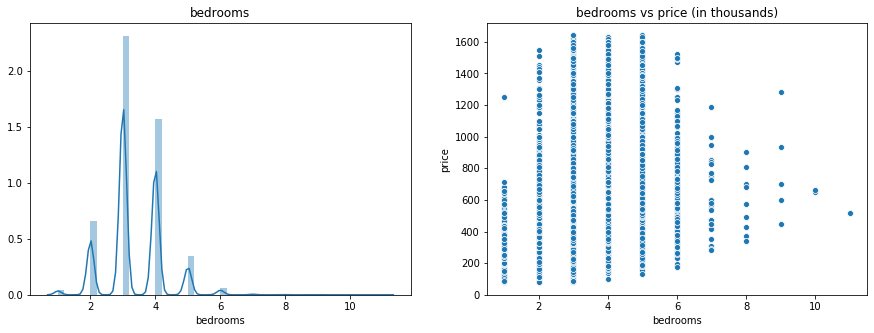

In [45]:
check_column(df.bedrooms, df.price)

I'm not going to use the 'bedrooms' feature in my model, because there are problems
with its linearity. But those same problems will be useful in my conclusions and
recommendations later on.

Moving forward: Re-creating some of the histograms of the features I've adjusted

In [46]:
temp_df = df[['price', 'sqft_living', 'bedrooms', 'lat', 'long']]

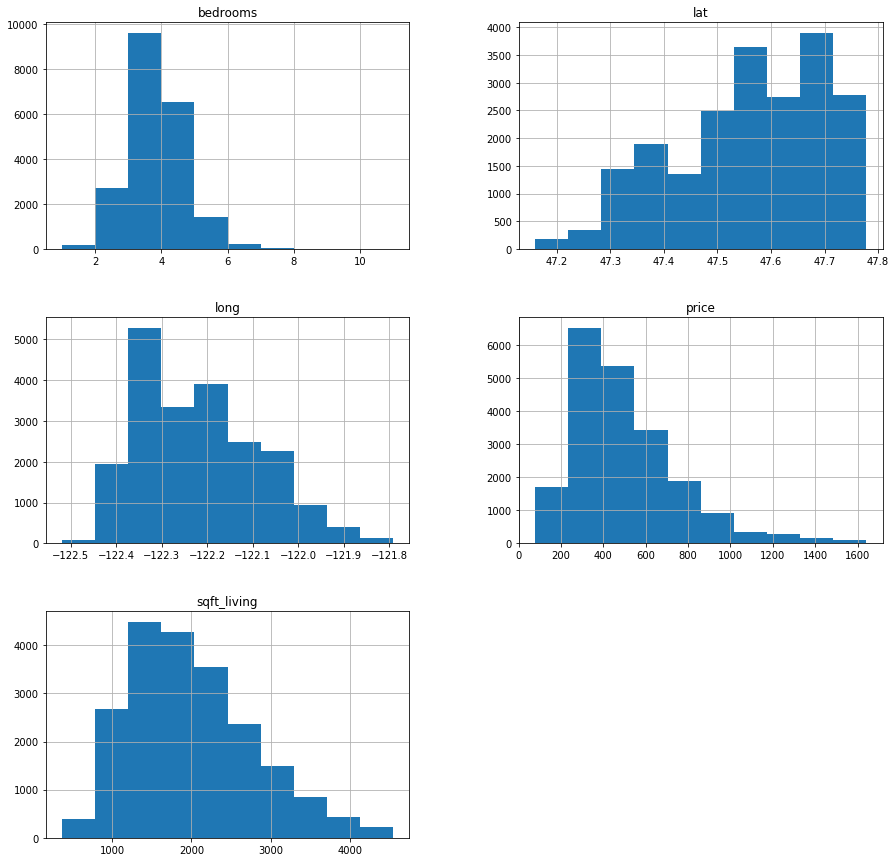

In [47]:
temp_df.hist(figsize = (15, 15))
plt.show()

Those look tons better.

## Handle multicollinearity

In [48]:
abs(df.corr()>.75)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
sqft_above,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False


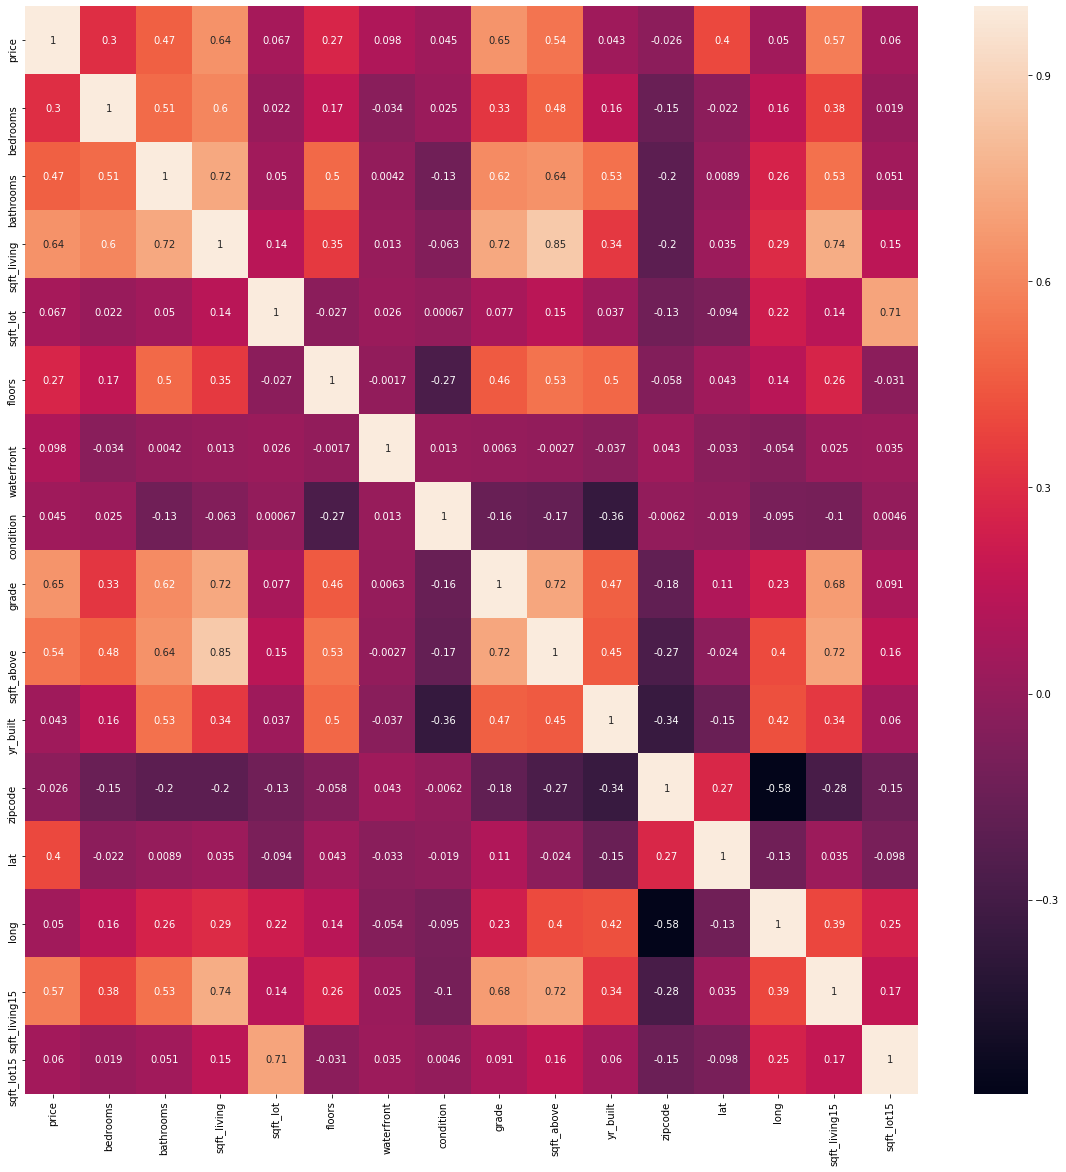

In [49]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot = True)

In [50]:
# Based on the above charts showing correlations, I will remove the following variables
# with correlaations over .75 to avoid multicolinearity convlicts:
# bathrooms, sqft_above, grade, sqft_living15, which all correlate with sqft_living.
# The presumption is that the square footage of living space is the driving factor behind the 
# other features, and those factors will only cause correlation conflicts if used in any meaningful analyses.

In [51]:
# Note that I wound up bringing grade and bathrooms back into some of the models
# after a few run-throughs to play with things a bit more.

df = df.drop(['sqft_above', 'sqft_living15'], axis = 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_lot15
0,10/13/2014,221.9,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,98178,47.5112,-122.257,5650
1,12/9/2014,538.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,98125,47.7210,-122.319,7639
2,2/25/2015,180.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,98028,47.7379,-122.233,8062
3,12/9/2014,604.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,98136,47.5208,-122.393,5000
4,2/18/2015,510.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,98074,47.6168,-122.045,7503


---------------------------------------------------------------------------
series dtype is float64

- Unique Values for long


(-122.374, -122.228]    8616
(-122.228, -122.083]    6406
(-122.083, -121.937]    3194
(-122.521, -122.374]    2034
(-121.937, -121.792]     519
Name: long, dtype: int64

n- Null Values 
0

	Describe
count    20769.000000
mean      -122.220039
std          0.131894
min       -122.519000
25%       -122.331000
50%       -122.237000
75%       -122.129000
max       -121.792000
Name: long, dtype: float64


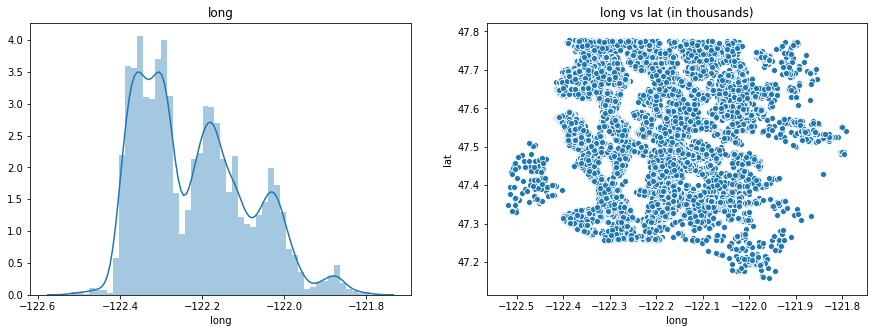

In [52]:
check_column(df['long'], df['lat'], nbins = 5)

Lat and long together basically create a map of Seattle and the surrounding areas. The histogram even
seems to represent the density of the Seattle area and the dropoff to the east. So latitude and longitude could
be indicators of where these locations fall within that area.

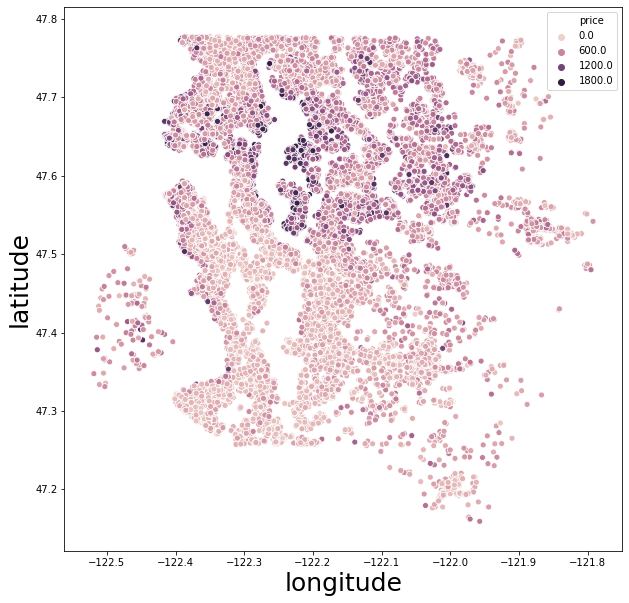

In [53]:
plt.figure(figsize = (10,10))
sns.scatterplot(df.long, df.lat, df.price)
plt.xlabel('longitude', fontsize = 25)
plt.ylabel('latitude', fontsize = 25)
plt.show()

# axes[1].set_title(f"{series_feature.name} vs {series_target.name} (in thousands)")
# sns.scatterplot(series_feature, series_target, ax = axes[1])

I'm a little worried about this because it doesn't look terribly linear. But we'll see how it works out.

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for yr_built


(2005.8, 2010.4]      1520
(2001.2, 2005.8]      1448
(1964.4, 1969.0]      1414
(1973.6, 1978.2]      1364
(1950.6, 1955.2]      1223
(1987.4, 1992.0]      1221
(1959.8, 1964.4]      1192
(1982.8, 1987.4]      1138
(1996.6, 2001.2]      1105
(2010.4, 2015.0]      1032
(1955.2, 1959.8]       941
(1946.0, 1950.6]       923
(1978.2, 1982.8]       849
(1992.0, 1996.6]       760
(1941.4, 1946.0]       747
(1923.0, 1927.6]       583
(1936.8, 1941.4]       527
(1969.0, 1973.6]       508
(1918.4, 1923.0]       433
(1927.6, 1932.2]       416
(1904.6, 1909.2]       394
(1913.8, 1918.4]       364
(1909.2, 1913.8]       334
(1899.884, 1904.6]     230
(1932.2, 1936.8]       103
Name: yr_built, dtype: int64

n- Null Values 
0

	Describe
count    20769.000000
mean      1970.582695
std         29.341696
min       1900.000000
25%       1951.000000
50%       1974.000000
75%       1996.000000
max       2015.000000
Name: yr_built, dtype: float64


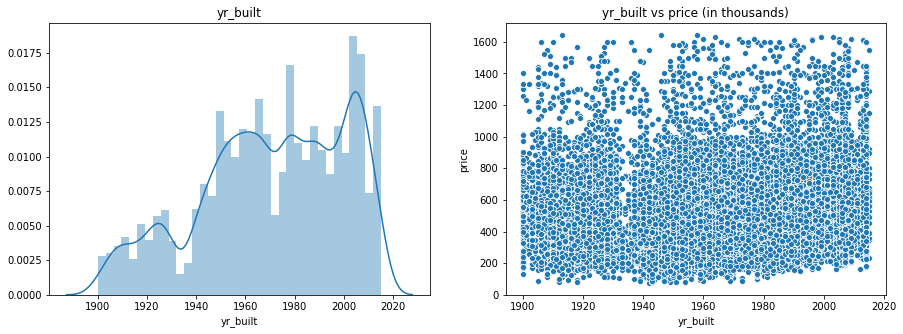

In [54]:
check_column(df['yr_built'], df['price'], nbins = 25)

I want to get rid of zipcode, but I want to check it out first to make sure there's nothing interesting.

---------------------------------------------------------------------------
series dtype is int64

- Unique Values for zipcode


(98020.8, 98040.6]              4226
(98100.0, 98119.8]              4164
(98040.6, 98060.4]              3094
(98000.80099999999, 98020.8]    2661
(98119.8, 98139.6]              1797
(98060.4, 98080.2]              1627
(98139.6, 98159.4]              1116
(98159.4, 98179.2]              1019
(98179.2, 98199.0]               717
(98080.2, 98100.0]               348
Name: zipcode, dtype: int64

n- Null Values 
0

	Describe
count    20769.000000
mean     98078.910877
std         53.580835
min      98001.000000
25%      98033.000000
50%      98070.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64


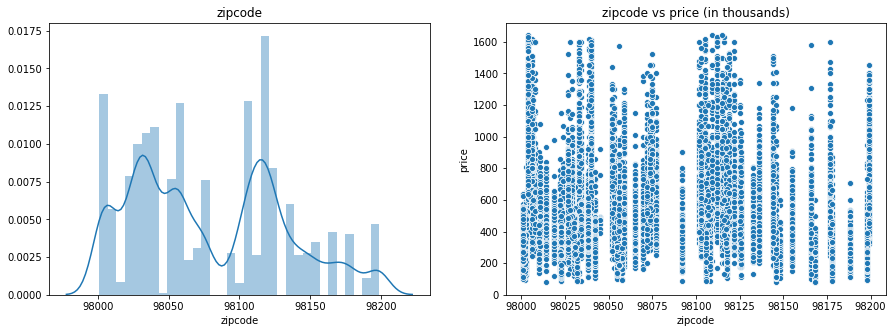

In [55]:
check_column(df['zipcode'], df['price'], nbins = 10)

It's definitely interesting, but I think I'm going to go a different direction with location and use lat and long instead.

## Final Scatters for last check

In [56]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,sqft_lot15
count,20769.000000,20769.000000,20769.000000,20769.000000,2.076900e+04,20769.000000,20769.000000,20769.000000,20769.000000,20769.000000,20769.000000,20769.000000,20769.000000,20769.000000
mean,502.121643,3.346430,2.072753,2004.668304,1.410738e+04,1.483244,0.003756,3.412393,7.581203,1970.582695,98078.910877,47.559595,-122.220039,12122.358274
std,252.131005,0.888595,0.717335,781.378588,3.779620e+04,0.538648,0.061169,0.651050,1.076595,29.341696,53.580835,0.140078,0.131894,25026.438805
min,78.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000,47.159300,-122.519000,651.000000
25%,320.000000,3.000000,1.500000,1410.000000,5.000000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,98033.000000,47.467000,-122.331000,5040.000000
50%,445.000000,3.000000,2.250000,1890.000000,7.500000e+03,1.000000,0.000000,3.000000,7.000000,1974.000000,98070.000000,47.571500,-122.237000,7520.000000
75%,625.000000,4.000000,2.500000,2490.000000,1.028900e+04,2.000000,0.000000,4.000000,8.000000,1996.000000,98118.000000,47.679600,-122.129000,9858.000000
max,1640.000000,11.000000,7.500000,4540.000000,1.651359e+06,3.500000,1.000000,5.000000,12.000000,2015.000000,98199.000000,47.777600,-121.792000,560617.000000


---------------------------------------------------------------------------
series dtype is int64

- Unique Values for sqft_living


(365.829, 2455.0]    15380
(2455.0, 4540.0]      5389
Name: sqft_living, dtype: int64

n- Null Values 
0

	Describe
count    20769.000000
mean      2004.668304
std        781.378588
min        370.000000
25%       1410.000000
50%       1890.000000
75%       2490.000000
max       4540.000000
Name: sqft_living, dtype: float64
---------------------------------------------------------------------------
series dtype is int64

- Unique Values for grade


(2.99, 7.5]    11140
(7.5, 12.0]     9629
Name: grade, dtype: int64

n- Null Values 
0

	Describe
count    20769.000000
mean         7.581203
std          1.076595
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         12.000000
Name: grade, dtype: float64
---------------------------------------------------------------------------
series dtype is int64

- Unique Values for bedrooms


(0.989, 6.0]    20724
(6.0, 11.0]        45
Name: bedrooms, dtype: int64

n- Null Values 
0

	Describe
count    20769.000000
mean         3.346430
std          0.888595
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64
---------------------------------------------------------------------------
series dtype is float64

- Unique Values for waterfront


(-0.002, 0.5]    20691
(0.5, 1.0]          78
Name: waterfront, dtype: int64

n- Null Values 
0

	Describe
count    20769.000000
mean         0.003756
std          0.061169
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64
---------------------------------------------------------------------------
series dtype is float64

- Unique Values for lat


(47.468, 47.778]    15547
(47.158, 47.468]     5222
Name: lat, dtype: int64

n- Null Values 
0

	Describe
count    20769.000000
mean        47.559595
std          0.140078
min         47.159300
25%         47.467000
50%         47.571500
75%         47.679600
max         47.777600
Name: lat, dtype: float64
---------------------------------------------------------------------------
series dtype is float64

- Unique Values for long


(-122.521, -122.155]    14562
(-122.155, -121.792]     6207
Name: long, dtype: int64

n- Null Values 
0

	Describe
count    20769.000000
mean      -122.220039
std          0.131894
min       -122.519000
25%       -122.331000
50%       -122.237000
75%       -122.129000
max       -121.792000
Name: long, dtype: float64


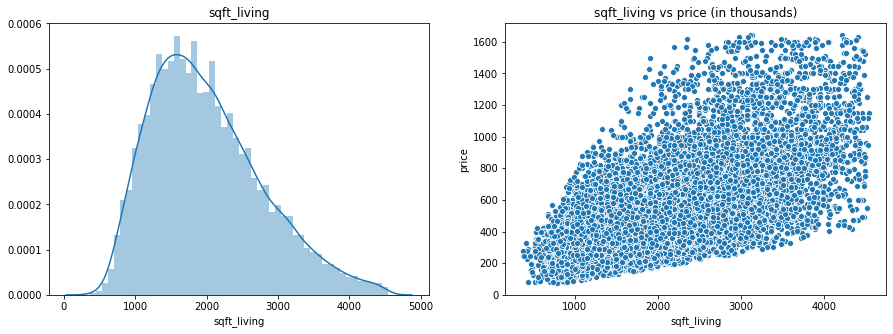

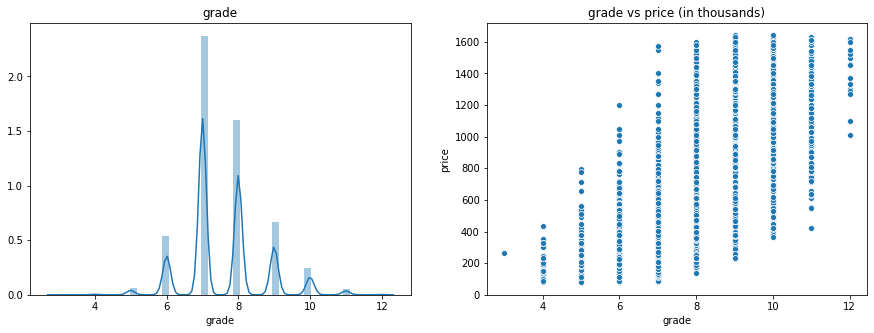

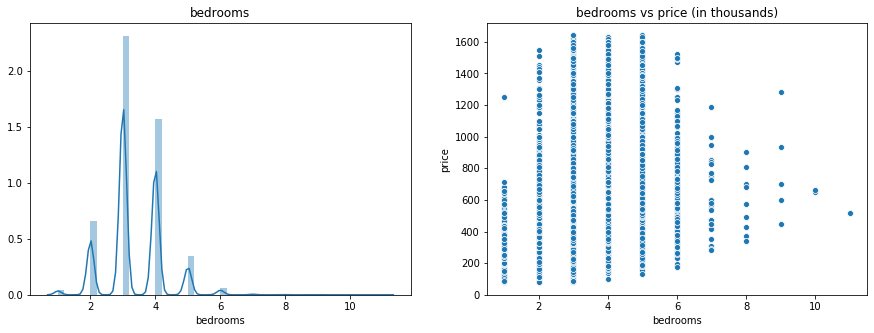

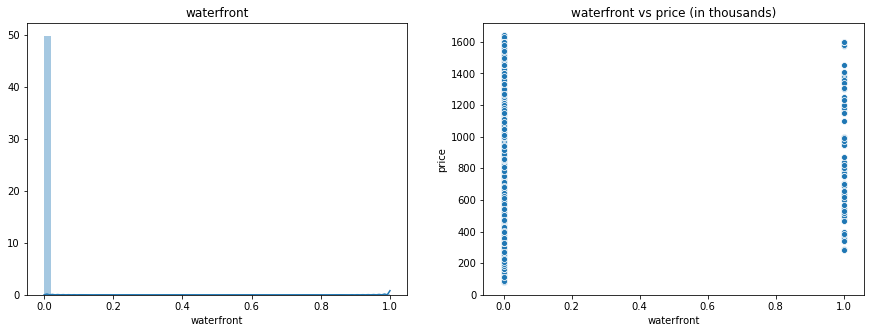

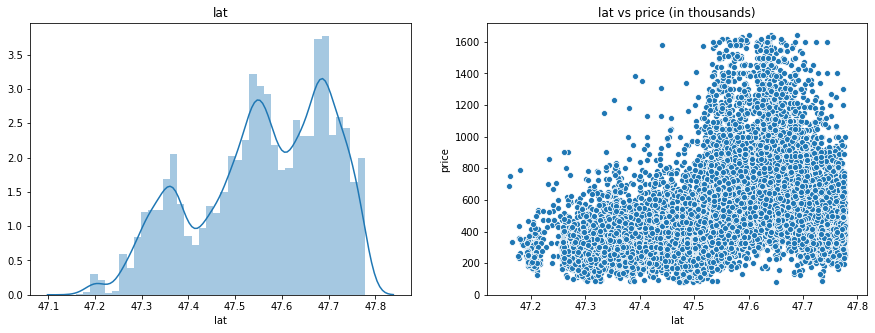

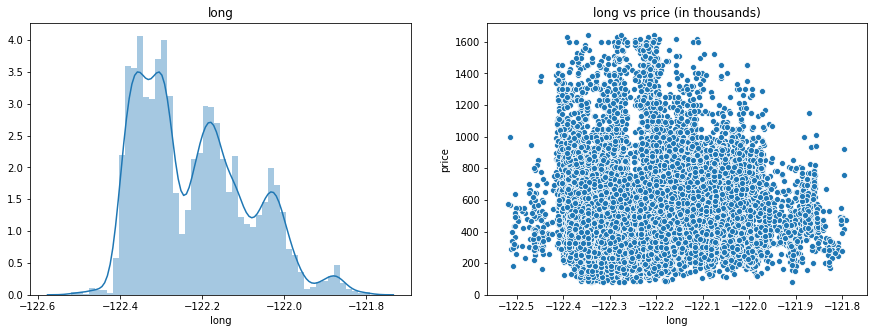

In [57]:
check_column(df['sqft_living'], df['price'], nbins = 2)
check_column(df['grade'], df['price'], nbins = 2)
check_column(df['bedrooms'], df['price'], nbins = 2)
check_column(df['waterfront'], df['price'], nbins = 2)
check_column(df['lat'], df['price'], nbins = 2)
check_column(df['long'], df['price'], nbins = 2)

# MODEL

## 1st Model Attempt

There might be some holes in the work up to this point but I want to get a working model together so I know where to move forward from.

In [58]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

I'll start out with just a few variables to keep it simple and make sure everything is working properly.

In [59]:
it_1_predictors = df[['sqft_living', 'waterfront', 'bedrooms']]
formula = 'price~sqft_living+C(waterfront)+bedrooms'

In [60]:
model_1 = ols(formula = formula, data = df).fit()

In [61]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.430
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     5225.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:34:44   Log-Likelihood:            -1.3848e+05
No. Observations:               20769   AIC:                         2.770e+05
Df Residuals:                   20765   BIC:                         2.770e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              156.4222      5.175     30.226      0.000     146.279     166.566
C(waterfront)[T.1.0]   349.2333     21.624     16.150      0.000     306.849     391.618
sqft_living              0.2311      0.002    109.069      0.000       0.227       0.235
bedrooms               -35.5341      1.864    -19.062      0.000     -39.188     -31.880
==============================================================================
Omnibus:                     3477.660   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7527.067
Skew:                           0.988   Prob(JB):                         0.00
Kurtosis:                       5.190   Cond. No.                     3.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Does it work?

In [62]:
def predict_value(sqft_living = None, waterfront = None, bedrooms = None):
    if not sqft_living:
        sqft_living = df['sqft_living'].mean()
    if not waterfront:
        waterfront = 0
    if not bedrooms:
        bedrooms = 3
    return (86.2416) + (0.3056*sqft_living) + (	825.3999*waterfront) + (-55.5479*bedrooms)

estimated_price = predict_value(sqft_living = 2000, waterfront = 1, bedrooms = 5)
print(estimated_price)

1245.1019999999999


The above value represents taking a stab at a real-world scenario of estimating the value of a house with ceratin features, in this case: a 2,000 sqft house with 5 bedrooms on the waterfront. Estimated price is $1.25M.

## 2nd Model Attempt
That first one had two problems: The latitude value had not been standardized (which I wound up dropping completely), and possiblly not enough features. Though the R^2 value was higher, the coefficients were screwy, and the real-world estimates were off by, oh, a billion dollars or so.

Trying again with scaling the lat & long values.

In [63]:
# Using min/max scalaing for lat & long values.
lat_minmax = (df['lat'] - min(df['lat'])) / (max(df['lat']) - min(df['lat']))
latmax = df['lat'].max()
latmin = df['lat'].min()
long_minmax = (df['long'] - min(df['long'])) / (max(df['long']) - min(df['long']))
longmax = df['long'].max()
longmin = df['long'].min()

In [64]:
age = pd.DataFrame(2019 - df['yr_built'])
age.columns = ['age']
it_2_predictors = df[['sqft_living', 'waterfront', 'bedrooms']]
it_2_predictors = pd.concat([it_1_predictors, lat_minmax, long_minmax, df['price']], axis = 1)
formula = 'price~sqft_living+C(waterfront)+bedrooms+lat_minmax+long_minmax'

In [65]:
model_2 = ols(formula = formula, data = it_2_predictors).fit()

In [66]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     5630.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:34:44   Log-Likelihood:            -1.3542e+05
No. Observations:               20769   AIC:                         2.709e+05
Df Residuals:                   20763   BIC:                         2.709e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              -72.6475      6.085    -11.938      0.000     -84.576     -60.719
C(waterfront)[T.1.0]   380.7472     18.720     20.339      0.000     344.054     417.440
sqft_living              0.2312      0.002    121.784      0.000       0.227       0.235
bedrooms               -29.2682      1.612    -18.152      0.000     -32.429     -26.108
lat_minmax             400.2762      5.105     78.416      0.000     390.271     410.281
long_minmax           -124.8105      6.659    -18.743      0.000    -137.863    -111.758
==============================================================================
Omnibus:                     4761.216   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15448.178
Skew:                           1.160   Prob(JB):                         0.00
Kurtosis:                       6.531   Cond. No.                     3.54e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.54e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
def predict_value(sqft_living = None, waterfront = None, bedrooms = None, lat = None):
    if not sqft_living:
        sqft_living = df['sqft_living'].mean()
    if not waterfront:
        waterfront = 0
    if not lat:
        lat = df['lat'].mean()
    else:
        lat = (lat - df.lat.min()) / (df.lat.max() - df.lat.min())
    if not bedrooms:
        bedrooms = 3
    return ((-201.9622) + (0.2964*sqft_living) + (851.1191*waterfront) +
            (-49.8772*bedrooms) + (442.7264*lat))

estimated_price = round(predict_value(sqft_living = 3000, waterfront = 0, bedrooms = 5, lat = 47.5), 2)
print(estimated_price)

681.81


## 3rd Model Attempt

Going to play with adding and maybe changing some of the variables

In [68]:
data_3 = pd.DataFrame([])
data_3['price'] = df['price']
data_3['sqft_living'] = df['sqft_living']
data_3['grade'] = df['price']
data_3['bathrooms'] = df['bathrooms']
data_3['bedrooms'] = df['bedrooms']
data_3['lat'] = lat_minmax
data_3['long'] = long_minmax
data_3['waterfront'] = df['waterfront']
data_3['grade'] = df['grade']
data_3['age'] = 2019 - df['yr_built']

In [69]:
formula = 'price~lat+C(waterfront)+grade+sqft_living+long'

In [70]:
model_3 = ols(formula = formula, data = data_3).fit()

In [71]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     6924.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:34:44   Log-Likelihood:            -1.3413e+05
No. Observations:               20769   AIC:                         2.683e+05
Df Residuals:                   20763   BIC:                         2.683e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -561.9376      8.982    -62.561      0.000    -579.544    -544.332
C(waterfront)[T.1.0]   397.2385     17.565     22.616      0.000     362.810     431.667
lat                    372.8648      4.825     77.283      0.000     363.408     382.322
grade                   80.9935      1.450     55.857      0.000      78.151      83.836
sqft_living              0.1318      0.002     65.316      0.000       0.128       0.136
long                  -138.6442      6.263    -22.138      0.000    -150.919    -126.369
==============================================================================
Omnibus:                     5139.677   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16860.133
Skew:                           1.249   Prob(JB):                         0.00
Kurtosis:                       6.640   Cond. No.                     3.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The below formula takes in values to pridict a house price based on the
following features:
    Square feet of living space
    Waterfront
    Grade
    Number of bedrooms
    Latitude

## 4th Model Attempt

Now that I'm done blindly feeling around in the dark, I'll actually try some
recursive feature elimination and see how that goes.

In [72]:
rfe_predictors = df[['sqft_living', 'waterfront', 'bedrooms', 'grade',
                     'bathrooms']]
rfe_predictors = pd.concat([it_2_predictors, lat_minmax, long_minmax, age], 
                           axis = 1)

In [73]:
rfe_predictors.head()

,sqft_living,waterfront,bedrooms,lat,long,price,lat,long,age
0,1180,0.0,3,0.569141,0.360385,221.9,0.569141,0.360385,64
1,2570,0.0,3,0.908459,0.275103,538.0,0.908459,0.275103,68
2,770,0.0,2,0.935792,0.393398,180.0,0.935792,0.393398,86
3,1960,0.0,4,0.584668,0.173315,604.0,0.584668,0.173315,54
4,1680,0.0,3,0.739932,0.651994,510.0,0.739932,0.651994,32


In [74]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select=5)
selector = selector.fit(rfe_predictors, df['price'])

In [75]:
selector.support_ 

array([False,  True,  True, False,  True,  True,  True, False, False])

In [76]:
selector.ranking_

array([5, 1, 1, 3, 1, 1, 1, 2, 4])

In [77]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[-1.43177298e-13 -7.09116472e-13 -3.94227504e-14  1.00000000e+00
  6.25306563e-14]
1.8758328224066645e-12


In [78]:
formula = 'price~grade+bedrooms+lat+long+waterfront'

In [79]:
model_4 = ols(formula = formula, data = data_3).fit()

In [80]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     5328.
Date:                Sun, 03 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:34:44   Log-Likelihood:            -1.3575e+05
No. Observations:               20769   AIC:                         2.715e+05
Df Residuals:                   20763   BIC:                         2.716e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -871.3284      8.864    -98.303      0.000    -888.702    -853.955
grade        137.9195      1.177    117.178      0.000     135.612     140.227
bedrooms      35.6836      1.391     25.655      0.000      32.957      38.410
lat          369.7992      5.219     70.856      0.000     359.570     380.029
long         -79.3304      6.682    -11.872      0.000     -92.428     -66.233
waterfront   439.7840     18.994     23.154      0.000     402.555     477.013
==============================================================================
Omnibus:                     5209.939   Durbin-Watson:                   1.943
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15983.620
Skew:                           1.291   Prob(JB):                         0.00
Kurtosis:                       6.436   Cond. No.                         139.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Going backward on the R^2 number, now. Throwing in the towel.

## Model Testing

Finally, a little train-test split to see how things shook out. I'll focus on our best model: Model #3.

In [81]:
from sklearn.model_selection import train_test_split

X = df[['sqft_living', 'grade', 'waterfront']]
X = pd.concat([X, lat_minmax, long_minmax], axis = 1)
Y = df['price']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [83]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

14538 6231 14538 6231


In [84]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [85]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 23799.877848680513
Test Mean Squarred Error: 23909.6804097783


Good enough for me. Calling it a day.

# iNTERPRET

Below is a function that takes in housing attributes and predicts the value for Kings County homes.

Because model 3 has our highest R^2 value, I'm using its values to create this estimate tool.

In [86]:
def predict_value(sqft_living = None, grade = None, lat = None, long = None, 
                  waterfront = None, age = None, bedrooms = None,
                  bathrooms = None):
    lat = (lat - latmin) / (latmax - latmin)
    long = (long - longmin) / (longmax - longmin)
    return round(((-561.9376) + (0.1318*sqft_living) +
            (397.2385*waterfront) + (80.9935*grade) +
            (372.8648*lat) + (-138.6442*long)), 2)

Below is a means of entering house data in order to retrive a predicted value.

In [87]:
prediction = input("Enter prediction? Y/N ")

if prediction == 'Y' or prediction == 'y':
    sqft_input = input('Square Feet: ')
    water_input = input('Waterfront? Y/N ')
    grade_input = input('Grade: ')
    lat_input = input('Latitude: ')
    long_input = input('Longitude: ')
    if water_input == 'Y' or water_input == 'y':
        water_input = 1
    else:
        water_input = 0
    estimated_price = predict_value(sqft_living = float(sqft_input),
                                   waterfront = water_input, grade =
                                   float(grade_input), lat = float(lat_input), 
                                   long = float(long_input))
    if estimated_price < 1000:
        estimated_price = int(estimated_price)
        estimated_price = '$' + str(estimated_price) + 'k'
    else:
        estimated_price = round(estimated_price / 1000, 1)
        estimated_price = '$' + str(estimated_price) + 'M'
    print(estimated_price)
else:
    print('OK then')
    

Enter prediction? Y/N 
OK then


Below I'm adding a couple of columns to demonstrate how closely the model can 
predict the existing data set.

In [88]:
df['estimated_price'] = predict_value(df.sqft_living, df.grade, df.lat, 
                                      df.long, df.waterfront)
df['estimated_percent'] = (df.price - df.estimated_price) / df.estimated_price

In [89]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,zipcode,lat,long,sqft_lot15,estimated_price,estimated_percent
0,10/13/2014,221.9,3,1.00,1180,5650,1.0,0.0,3,7,0.0,1955,98178,47.5112,-122.257,5650,322.79,-0.312556
1,12/9/2014,538.0,3,2.25,2570,7242,2.0,0.0,3,7,400.0,1951,98125,47.7210,-122.319,7639,644.33,-0.165024
2,2/25/2015,180.0,2,1.00,770,10000,1.0,0.0,3,6,0.0,1933,98028,47.7379,-122.233,8062,319.89,-0.437307
3,12/9/2014,604.0,4,3.00,1960,5000,1.0,0.0,5,7,910.0,1965,98136,47.5208,-122.393,5000,457.32,0.320738
4,2/18/2015,510.0,3,2.00,1680,8080,1.0,0.0,3,8,0.0,1987,98074,47.6168,-122.045,7503,492.93,0.034630


In [90]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode,lat,long,sqft_lot15,estimated_price,estimated_percent
count,20769.000000,20769.000000,20769.000000,20769.000000,2.076900e+04,20769.000000,20769.000000,20769.000000,20769.000000,20769.000000,20769.000000,20769.000000,20769.000000,20769.000000,20769.000000,20769.000000
mean,502.121643,3.346430,2.072753,2004.668304,1.410738e+04,1.483244,0.003756,3.412393,7.581203,1970.582695,98078.910877,47.559595,-122.220039,12122.358274,502.180988,0.287352
std,252.131005,0.888595,0.717335,781.378588,3.779620e+04,0.538648,0.061169,0.651050,1.076595,29.341696,53.580835,0.140078,0.131894,25026.438805,199.363843,43.698388
min,78.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000,47.159300,-122.519000,651.000000,-320.860000,-538.037037
25%,320.000000,3.000000,1.500000,1410.000000,5.000000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,98033.000000,47.467000,-122.331000,5040.000000,365.230000,-0.203074
50%,445.000000,3.000000,2.250000,1890.000000,7.500000e+03,1.000000,0.000000,3.000000,7.000000,1974.000000,98070.000000,47.571500,-122.237000,7520.000000,488.570000,-0.038893
75%,625.000000,4.000000,2.500000,2490.000000,1.028900e+04,2.000000,0.000000,4.000000,8.000000,1996.000000,98118.000000,47.679600,-122.129000,9858.000000,621.860000,0.154781
max,1640.000000,11.000000,7.500000,4540.000000,1.651359e+06,3.500000,1.000000,5.000000,12.000000,2015.000000,98199.000000,47.777600,-121.792000,560617.000000,1392.820000,6249.000000


# CONCLUSIONS & RECOMMENDATIONS

Don't move to Seattle. The homes are expensive and the weather is crummy.

It may not be surprising that homes on the waterfront are more valuable than those that aren't. But what our latitude and longitude features also demonstrate that there are additional location factors that can have a major impact on home value.

Especially when building on expensive land, in order to achieve the best results, there are several factors to keep in mind in order to maximize the usage of that real estate.

Along with overall square feet of living space, the grade based on the Kings County grading system affects the house in a very linear way. An eye toward improving this score should be maintained at all times by builders, buyers, and renovators.

As to the square footage, it can maximized at a high level for the best investment returns. But how that space is used is just as important.

After five or six bedrooms, there are diminishing returns to how much they add to the value of a home, and it seems they might even begin to detract. What this might suggest is that with too many bedrooms, the space begins to feel closed in, and does not provide the value of a more open floorplan. Large, open spaces might create the feeling of a more valuable home, raising the price at which a buyer might be willing to pay. 

For the builder or re-builder, this pays off in two ways: The home's value increases due to better use of space, and there is a lower cost associated with decreased labor and materians for fewer rooms, factoring in extra wall materials, electrical, etc. Even more so for bathrooms, which require plumbing and fixtures in addition.


# Supplemental materials for presentation

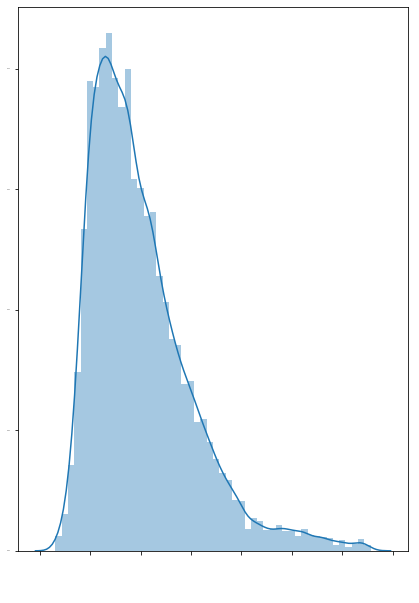

In [91]:
plt.figure(figsize = (7,10))
sns.distplot(df['price'])
plt.xlabel('Price (in thousands)', fontsize = 20, color = 'white')
plt.xticks(fontsize = 15, color = 'white')
plt.yticks(fontsize = 0)
plt.show()

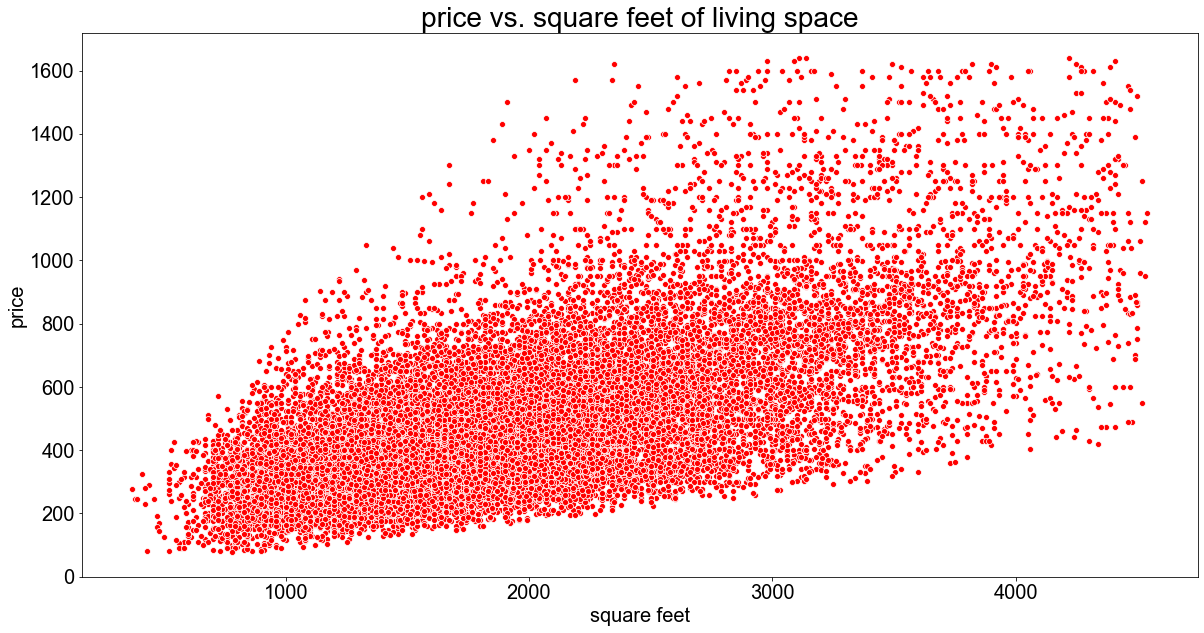

In [92]:
plt.figure(figsize = (20,10))
sns.scatterplot(df.sqft_living, df.price, color = 'red')
plt.xlabel('square feet', fontsize = 20, color = 'black')
plt.ylabel('price', fontsize = 20, color = 'black')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('price vs. square feet of living space', fontsize = 28, color = 'black')
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'silver'})
plt.show()

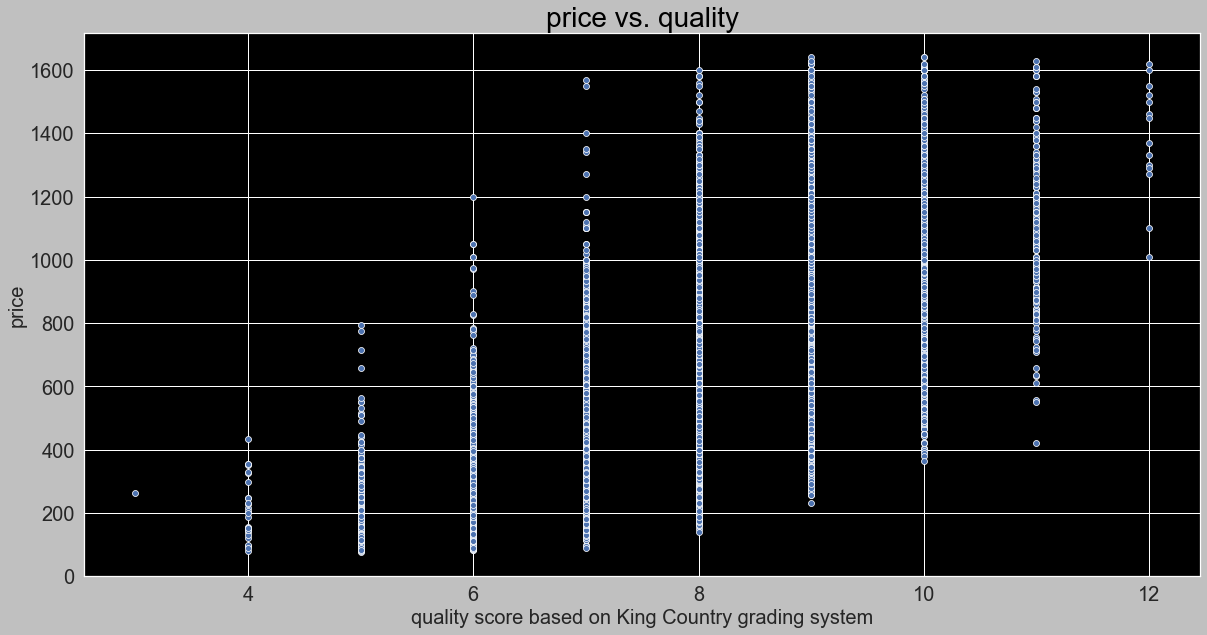

In [93]:
plt.figure(figsize = (20,10))
sns.scatterplot(df.grade, df.price)
plt.xlabel('quality score based on King Country grading system', fontsize = 20)
plt.ylabel('price', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('price vs. quality', fontsize = 28, color = 'black')
sns.set(rc={'axes.facecolor': 'white', 'figure.facecolor': 'white'})
plt.show()